In [1]:
import pandas as pd
import numpy as np
import re

In [5]:
file_name="output/amazon_reviews_us_Books_v1_00.tsv"
cols = pd.read_table(file_name, nrows=1,).columns
df = pd.read_table(file_name, usecols=cols, dtype={'star_rating':'int64'}, 
                   on_bad_lines='warn', quoting = 3, encoding="utf-8")
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,25933450,RJOVP071AVAJO,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,Books,5,0,0,N,Y,Five Stars,I love it and so does my students!,2015-08-31
1,US,1801372,R1ORGBETCDW3AI,1623953553,729938122,I Saw a Friend,Books,5,0,0,N,Y,"Please buy ""I Saw a Friend""! Your children wil...",My wife and I ordered 2 books and gave them as...,2015-08-31
2,US,5782091,R7TNRFQAOUTX5,142151981X,678139048,"Black Lagoon, Vol. 6",Books,5,0,0,N,Y,Shipped fast.,Great book just like all the others in the ser...,2015-08-31
3,US,32715830,R2GANXKDIFZ6OI,014241543X,712432151,If I Stay,Books,5,0,0,N,N,Five Stars,So beautiful,2015-08-31
4,US,14005703,R2NYB6C3R8LVN6,1604600527,800572372,Stars 'N Strips Forever,Books,5,2,2,N,Y,Five Stars,Enjoyed the author's story and his quilts are ...,2015-08-31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319090 entries, 0 to 10319089
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 1.2+ GB


In [5]:
# Determine how many missing values exist in the collection
def missing(data):
    null_values=data.isna().sum()
    null_values=pd.DataFrame(null_values,columns=['null'])
    sum_tot=len(data)
    null_values['percent']=null_values['null']/sum_tot*100
    return round(null_values,3).sort_values('percent',ascending=False)

missing(df)

,null,percent
review_body,197,0.002
review_headline,71,0.001
marketplace,0,0.000
customer_id,0,0.000
review_id,0,0.000
product_id,0,0.000
product_parent,0,0.000
product_title,0,0.000
product_category,0,0.000
star_rating,0,0.000


In [6]:
df["review"] = df["review_headline"]+" "+df["review_body"]

In [7]:
df = df.loc[(df.vine == "N") & (df.verified_purchase == "Y")] 
df.shape

(7449618, 16)

In [8]:
df= df.dropna()
df.shape

(7449401, 16)

In [9]:
df.describe().round(1)

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,7449401.0,7449401.0,7449401.0,7449401.0,7449401.0
mean,28109015.2,500907975.8,4.5,1.1,1.6
std,15289567.5,287933118.4,1.0,7.7,9.0
min,10024.0,576.0,1.0,0.0,0.0
25%,14682373.0,253853244.0,4.0,0.0,0.0
50%,26762869.0,500645081.0,5.0,0.0,0.0
75%,42464168.0,749059695.0,5.0,1.0,1.0
max,53096584.0,999998764.0,5.0,4054.0,4756.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

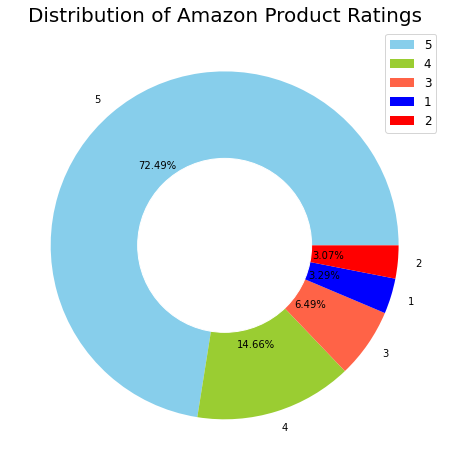

In [11]:
ratings = df["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors, autopct = "%0.2f%%",)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.legend()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7449401 entries, 0 to 10319078
Data columns (total 16 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
 15  review             object
dtypes: int64(5), object(11)
memory usage: 966.2+ MB


In [13]:
sorted_df = df.sort_values(by='helpful_votes', ascending=False)

In [14]:
sorted_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review
6714997,US,53096575,R2I0T26SV0ELPP,0316219266,665813273,The Everything Store: Jeff Bezos and the Age o...,Books,1,4054,4756,N,Y,I wanted to like this book,"In the first chapter, the book sets the stage ...",2013-11-04,I wanted to like this book In the first chapte...
1302821,US,12637794,RZGFXZ2HYHHRA,1780671067,509449366,Secret Garden: An Inky Treasure Hunt and Color...,Books,5,3416,3449,N,Y,CHOOSE THE RIGHT COLORING PENCILS,This is the list of items I use for coloring a...,2015-05-02,CHOOSE THE RIGHT COLORING PENCILS This is th...
9677468,US,30381644,R25ITJRIMQW92F,0805096663,647864157,Killing Kennedy: The End of Camelot,Books,1,2893,3589,N,Y,SORRY BILL,"I was working in downtown Washington, D.C. on ...",2012-10-15,SORRY BILL I was working in downtown Washingto...
3476455,US,26445230,R2I37K23W0YCC9,1623363586,465642569,Thug Kitchen: The Official Cookbook: Eat Like ...,Books,5,2746,2841,N,Y,"Great Taste, A Little Complicated","I'll start by saying, the food in this book is...",2014-11-02,"Great Taste, A Little Complicated I'll start b..."
10311599,US,52830381,R2ATIJCX4DJWBB,1400069289,136914857,The Power of Habit: Why We Do What We Do in Li...,Books,1,2551,3021,N,Y,"One or two chapters of interest, the rest filler",The first two chapters weren't bad. They made ...,2012-05-04,"One or two chapters of interest, the rest fill..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536321,US,50893495,R20KL91OU5COS8,0736431209,435679704,A Tale of Two Sisters (Disney Frozen) (Step in...,Books,4,0,0,N,Y,She loved it,My Frozen addicted granddaughter loved this bo...,2014-10-27,She loved it My Frozen addicted granddaughter ...
3536320,US,11874316,R6QE5BC6C6N92,1133495230,729783997,Strategic Management: Concepts: Competitivenes...,Books,5,0,0,N,Y,Five Stars,very good,2014-10-27,Five Stars very good
3536319,US,14027989,R9QBQ77NWP6H3,1477451498,468661035,Outliers: The Story of Success: A BookCaps Stu...,Books,5,0,0,N,Y,Five Stars,What a good read!,2014-10-27,Five Stars What a good read!
3536315,US,15692641,R3T4C10N99WQ79,0373242697,399489669,That First Special Kiss (Family Found: Sons A...,Books,4,0,1,N,Y,A good read,I'd forgotten how much I enjoy this author. It...,2014-10-27,A good read I'd forgotten how much I enjoy thi...


In [15]:
df["star_rating"].value_counts()

5    5399946
4    1091970
3     483620
1     245219
2     228646
Name: star_rating, dtype: int64

In [22]:
sorted_df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'review'],
      dtype='object')

In [23]:
df=sorted_df

In [24]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'review'],
      dtype='object')

In [25]:
df = df.drop(['marketplace', 'customer_id', 'product_id',
       'product_parent', 'product_title', 'product_category',
       'vine', 'verified_purchase',
       'review_headline', 'review_body', ], axis=1)

In [26]:
df

,review_id,star_rating,helpful_votes,total_votes,review_date,review
6714997,R2I0T26SV0ELPP,1,4054,4756,2013-11-04,I wanted to like this book In the first chapte...
1302821,RZGFXZ2HYHHRA,5,3416,3449,2015-05-02,CHOOSE THE RIGHT COLORING PENCILS This is th...
9677468,R25ITJRIMQW92F,1,2893,3589,2012-10-15,SORRY BILL I was working in downtown Washingto...
3476455,R2I37K23W0YCC9,5,2746,2841,2014-11-02,"Great Taste, A Little Complicated I'll start b..."
10311599,R2ATIJCX4DJWBB,1,2551,3021,2012-05-04,"One or two chapters of interest, the rest fill..."
...,...,...,...,...,...,...
3536321,R20KL91OU5COS8,4,0,0,2014-10-27,She loved it My Frozen addicted granddaughter ...
3536320,R6QE5BC6C6N92,5,0,0,2014-10-27,Five Stars very good
3536319,R9QBQ77NWP6H3,5,0,0,2014-10-27,Five Stars What a good read!
3536315,R3T4C10N99WQ79,4,0,1,2014-10-27,A good read I'd forgotten how much I enjoy thi...


In [27]:
df.to_csv('output/Amazon_reviews_verified_f1.csv', index=False)

In [2]:
# !pip3 install vaderSentiment
dfs = pd.read_csv('output/Amazon_reviews_verified_f1.csv')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7449401 entries, 0 to 7449400
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   review_id      object
 1   star_rating    int64 
 2   helpful_votes  int64 
 3   total_votes    int64 
 4   review_date    object
 5   review         object
dtypes: int64(3), object(3)
memory usage: 341.0+ MB


In [31]:
dfs.isna().sum()

review_id        0
star_rating      0
helpful_votes    0
total_votes      0
review_date      0
review           0
dtype: int64

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
    
dfs["polarities"] = [sentiments.polarity_scores(i) for i in dfs["review"]]

In [24]:
# sentiment analysis tool for getting positive =1, negetive = -1 and neutral = 0.

def sentimental_Score(score):
    if score["compound"] >= 0.5:
        return "positive"
    elif (score["compound"] > -0.5) and (score["compound"] < 0.5):
        return "neutral"
    elif score["compound"] <= -0.5:
        return "negetive"
    
dfs['sentiment_score']=dfs["polarities"].apply(lambda x: sentimental_Score(x))

In [25]:
dfs['sentiment_score'].value_counts()

positive    635624
neutral     333287
negetive    174319
Name: sentiment_score, dtype: int64

In [26]:
dfs.to_csv('output/Amazon_reviews_polarised.csv', index=False)

In [27]:
# category analysis  for getting product, delivery and packaging.
def review_Category(review):
    regex_delivery = r"\bdeliver"
    regex_package = r"\bpackag"
    matches_delivery = re.finditer(regex_delivery, review, re.MULTILINE | re.IGNORECASE)
    matches_package = re.finditer(regex_package, review, re.MULTILINE | re.IGNORECASE)
    if sum(1 for _ in matches_delivery):
        return 'delivery'
    elif sum(1 for _ in matches_package):
        return 'packaging'
    else:
        return 'product'
    
dfs['review_category']=dfs["review"].apply(lambda x: review_Category(x))
dfs

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,polarities,sentiment_score,review_category
0,US,53096575,R2I0T26SV0ELPP,0316219266,665813273,The Everything Store: Jeff Bezos and the Age o...,Books,1,4054,4756,N,Y,I wanted to like this book,"In the first chapter, the book sets the stage ...",2013-11-04,I wanted to like this book In the first chapte...,"{'neg': 0.055, 'neu': 0.78, 'pos': 0.164, 'com...",positive,product
1,US,12637794,RZGFXZ2HYHHRA,1780671067,509449366,Secret Garden: An Inky Treasure Hunt and Color...,Books,5,3416,3449,N,Y,CHOOSE THE RIGHT COLORING PENCILS,This is the list of items I use for coloring a...,2015-05-02,CHOOSE THE RIGHT COLORING PENCILS This is th...,"{'neg': 0.036, 'neu': 0.882, 'pos': 0.082, 'co...",positive,product
2,US,30381644,R25ITJRIMQW92F,0805096663,647864157,Killing Kennedy: The End of Camelot,Books,1,2893,3589,N,Y,SORRY BILL,"I was working in downtown Washington, D.C. on ...",2012-10-15,SORRY BILL I was working in downtown Washingto...,"{'neg': 0.17, 'neu': 0.779, 'pos': 0.052, 'com...",negetive,product
3,US,26445230,R2I37K23W0YCC9,1623363586,465642569,Thug Kitchen: The Official Cookbook: Eat Like ...,Books,5,2746,2841,N,Y,"Great Taste, A Little Complicated","I'll start by saying, the food in this book is...",2014-11-02,"Great Taste, A Little Complicated I'll start b...","{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",positive,product
4,US,52830381,R2ATIJCX4DJWBB,1400069289,136914857,The Power of Habit: Why We Do What We Do in Li...,Books,1,2551,3021,N,Y,"One or two chapters of interest, the rest filler",The first two chapters weren't bad. They made ...,2012-05-04,"One or two chapters of interest, the rest fill...","{'neg': 0.048, 'neu': 0.827, 'pos': 0.126, 'co...",positive,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143225,US,28046296,R23GERQR5TWKMZ,1563924005,594075881,Jeep Cherokee 1984 thru 2000 (Cherokee/Wagonee...,Books,2,0,0,N,Y,Two Stars,too generic,2014-10-27,Two Stars too generic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,product
1143226,US,33982927,R3NX9XXD4ICVSW,1571880674,807124818,Great White Sturgeon Angling,Books,2,0,0,N,Y,Like a previous review said,"Like a previous review said, I didnt need a bo...",2014-10-27,Like a previous review said Like a previous re...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",neutral,product
1143227,US,941561,R3K6GOVP27M2UE,0380732238,815166816,Smack,Books,2,0,0,N,Y,Two Stars,Amazing book!!!!!! Got a great deal on Amazon...,2014-10-27,Two Stars Amazing book!!!!!! Got a great deal...,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",positive,product
1143228,US,41635933,R2HDBHEEZYAQKT,160874115X,399846955,"The Bells, Op. 35: Vocal Score (Russian Edition)",Books,2,0,0,N,Y,"Watch out, this is the version that has no ...","Watch out, this is the version that has no Eng...",2014-10-27,"Watch out, this is the version that has no ......","{'neg': 0.085, 'neu': 0.872, 'pos': 0.043, 'co...",neutral,product


In [28]:
missing(dfs)

,null,percent
marketplace,0,0.0
vine,0,0.0
sentiment_score,0,0.0
polarities,0,0.0
review,0,0.0
review_date,0,0.0
review_body,0,0.0
review_headline,0,0.0
verified_purchase,0,0.0
total_votes,0,0.0


In [29]:
dfs['review_category'].value_counts()

product      1120903
delivery       14236
packaging       8091
Name: review_category, dtype: int64

In [30]:
dfs.to_csv('output/Amazon_reviews_categorised.csv', index=False)

In [4]:
dfs = pd.read_csv('output/Amazon_reviews_sentiment_scores_f1.csv')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582135 entries, 0 to 582134
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   review_id        582135 non-null  object
 1   star_rating      582135 non-null  int64 
 2   review_date      582135 non-null  object
 3   review           582135 non-null  object
 4   sentiment_score  582135 non-null  object
 5   review_category  582135 non-null  object
 6   sentiment_class  582135 non-null  object
dtypes: int64(1), object(6)
memory usage: 31.1+ MB


In [5]:
dfs['sentiment_class'].value_counts()

Neutral     571888
Positive      7060
Negative      3187
Name: sentiment_class, dtype: int64

In [6]:
dfs['sentiment_score'].value_counts()

positive    378979
negative    127543
neutral      75613
Name: sentiment_score, dtype: int64